In [9]:
import pandas as pd
import gdown

class Mamdani_FIS:
    def __init__(self,numberOfMembershipFunctionInput = 5,numberOfMembershipFunctionOutput = 9, maxOfVelocity=120, maxOfDistance=1000, maxOfPedal = 45):
        self.numberOfMembershipFunctionInput = numberOfMembershipFunctionInput
        self.numberOfMembershipFunctionOutput = numberOfMembershipFunctionOutput
        self.maxOfVelocity = maxOfVelocity
        self.maxOfDistance = maxOfDistance
        self.maxOfPedal = maxOfPedal
        self.data = self.get_data()


    def get_data(self):
        # Assuming the file is now a direct download link to an Excel file
        file_id = 'FILE_ID_FROM_GOOGLE_DRIVE'
        file_path = f'https://drive.google.com/uc?export=download&id=12BT5gwoj40EPbGoR3AyMnRaJNrSnKCnk'
        gdown.download(file_path, 'local_filename.xlsx', quiet=False)
        return pd.read_excel('local_filename.xlsx')


    # Define parameters for membership functions
    def get_parameters_MFs(self, numberOfMFs, maxValue):
        step=maxValue/(numberOfMFs-1)
        parameters_MFs=[]
        for i in range(numberOfMFs):
           if(i==0):
              index=[0,0,1*step]
           elif(i==numberOfMFs-1):
              index=[(i-1)*step, i*step, i*step]
           else:
              index=[(i-1)*step, i*step, (i+1)*step]
           parameters_MFs.append(index)
        return  parameters_MFs


    # Define membership functions
    def triangular(self, x, listParameters):
        a, b, c = listParameters[0],listParameters[1],listParameters[2]
        if a <= x <= b:
            return (x - a) / (b - a)
        elif b < x <= c:
            return (c - x) / (c - b)
        else:
            return 0.0


    def fill_rules_table_with_MFs_Inputs(self,input1, input2):
        parameters_MFs_Velocity=self.get_parameters_MFs(numberOfMembershipFunctionInput,maxOfVelocity)
        parameters_MFs_Distance=self.get_parameters_MFs(numberOfMembershipFunctionInput,maxOfDistance)
        print(parameters_MFs_Velocity)
        # print(parameters_MFs_Distance)
        for i in range(numberOfMembershipFunctionInput*numberOfMembershipFunctionInput):
           # print(data.iloc[i, 0])
           listParameters1 = parameters_MFs_Velocity[self.data.iloc[i, 0]-1]
           listParameters2 = parameters_MFs_Distance[self.data.iloc[i, 1]-1]
           MF_value1 = self.triangular(input1,listParameters1)
           MF_value2 = self.triangular(input2,listParameters2)
           self.data.iloc[i, 3] = MF_value1
           self.data.iloc[i, 4] = MF_value2


    def inference_product(self):
        product_column = self.data.iloc[:, 3] * self.data.iloc[:, 4]
        self.data.iloc[:, 5] = product_column


    def inference_minimum(self):
        min_values = self.data.iloc[:, [3, 4]].min(axis=1)
        self.data.iloc[:, 5] = min_values


    def fill_rules_table_with_Center_MFs_Output(self, numberOfMFs, maxValue):
        parameters_MFs_Pedal=self.get_parameters_MFs(numberOfMembershipFunctionOutput,maxOfPedal)
        for i in range(numberOfMembershipFunctionInput*numberOfMembershipFunctionInput):
           listParameters1 = parameters_MFs_Pedal[self.data.iloc[i, 2]-1]
           # print(data.iloc[i, 0])
           if(i==0):
              centerOfMF=(listParameters1[1]+listParameters1[2])/2.0
           elif(i==numberOfMFs-1):
              centerOfMF=(listParameters1[0]+listParameters1[1])/2.0
           else:
              centerOfMF=listParameters1[1]
           self.data.iloc[i, 6] = centerOfMF


    def get_output(self, input1, input2):
        self.fill_rules_table_with_MFs_Inputs(input1, input2)
        # self.inference_product()
        self.inference_minimum()
        self.fill_rules_table_with_Center_MFs_Output(numberOfMembershipFunctionOutput, maxOfPedal)
        sum_column_6 = (self.data.iloc[:, 6] * self.data.iloc[:, 5]).sum()
        sum_column_5 = self.data.iloc[:, 5].sum()
        return sum_column_6/sum_column_5

    def get_rules_table(self):
        return self.data

numberOfMembershipFunctionInput=5
numberOfMembershipFunctionOutput=9
maxOfVelocity=120
maxOfDistance=1000
maxOfPedal = 45
numberOfMembershipFunctionInput = 5
numberOfMembershipFunctionOutput = 9

# Create an instance of Mamdani_FIS
fis = Mamdani_FIS()
pedal = fis.get_output(13.25, 58)
print(pedal)
fis.get_rules_table()


Downloading...
From: https://drive.google.com/uc?export=download&id=12BT5gwoj40EPbGoR3AyMnRaJNrSnKCnk
To: /content/local_filename.xlsx
100%|██████████| 9.08k/9.08k [00:00<00:00, 5.96MB/s]


[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
40.62884221311475


,Velocity,Distance,Pedal,MF_Vel,MF_Dis,Product,Center_Pedal
0,1,1,9,0.558333,0.768,0.558333,45.0000
1,1,2,8,0.558333,0.232,0.232000,39.3750
2,1,3,7,0.558333,0.000,0.000000,33.7500
3,1,4,6,0.558333,0.000,0.000000,28.1250
4,1,5,5,0.558333,0.000,0.000000,22.5000
5,2,1,8,0.441667,0.768,0.441667,39.3750
6,2,2,7,0.441667,0.232,0.232000,33.7500
7,2,3,6,0.441667,0.000,0.000000,28.1250
8,2,4,5,0.441667,0.000,0.000000,19.6875
9,2,5,4,0.441667,0.000,0.000000,16.8750


[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.0], [30.0, 60.0, 90.0], [60.0, 90.0, 120.0], [90.0, 120.0, 120.0]]
[[0, 0, 30.0], [0.0, 30.0, 60.

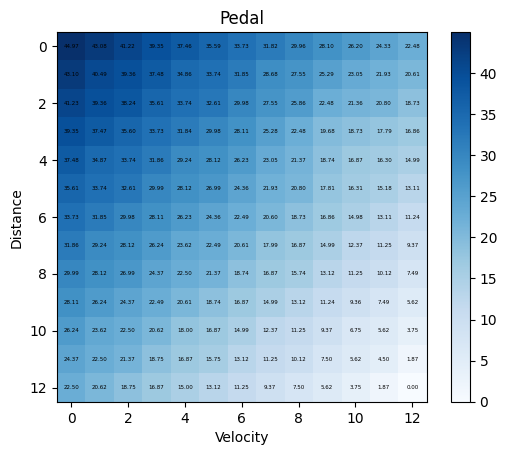

In [10]:
import numpy as np
import matplotlib.pyplot as plt

num=13

samplesVelocity = np.linspace(0.1, maxOfVelocity, num)
samplesDistance = np.linspace(0.1, maxOfDistance, num)

matrix = np.random.rand(num, num)

for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      # print(i,j)
      matrix[i, j] = fis.get_output(samplesVelocity[i], samplesDistance[j])

# Define maximum value
max_value = np.max(matrix)

# Create a new figure and axis
fig, ax = plt.subplots()

# Create a heatmap
heatmap = ax.imshow(matrix, cmap='Blues')

# Add color bar
cbar = plt.colorbar(heatmap)


# Iterate over each cell to annotate the value
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='black',fontsize=4)

plt.title('Pedal')
plt.xlabel('Velocity')
plt.ylabel('Distance')

# Show plot
plt.show()
